In this notebook we plot the data generated by the script 
est_err_homod_diag_iter.py and generate the subplots shown in Fig.2 of the main
text.

In [4]:
import pandas as pd
from qutip import *
from scipy.sparse.linalg import eigs
settings.core = CoreOptions(default_dtype='CSR')
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from matplotlib import rc
import matplotlib as mpl
import scipy.optimize as opt
rc('text', usetex=True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["legend.borderpad"] = 0.15
mpl.rcParams["font.size"] = 8

In [5]:
def HP_approx(ratio, N, phi):
    """Holstein-Primakoff approximation of the estimation error for homodyne
    detection of the phase phi of the driving field in the boundary time 
    crystal (see Eq. (8) of the main text)."""
    omega_c = N/2
    return 1/(2*ratio*omega_c*abs(np.cos(phi)))

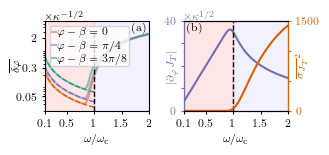

In [6]:
N   = 40 # System size, given by the choice in est_err_homod_diag_iter.py
df  = pd.read_csv(f'est_error_homodyne_N{N}.csv')
df  = pd.DataFrame(df)

colors=['#1b9e77','#d95f02','#7570b3']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(0.95*3.54331,0.45*3.54331),
                                     width_ratios=[1,1],
                                     layout='tight')

ax1.plot(df['ratio'].loc[(df['phi']==0) & (df['ratio']<=2)], 
         df['est_err_homod'].loc[(df['phi']==0) & (df['ratio']<=2)],
         color=colors[1], label=r'$\varphi - \beta=0$', alpha=0.5)
ax1.plot(df['ratio'].loc[(df['phi']==0.25*np.pi) & (df['ratio']<=2)], 
         df['est_err_homod'].loc[(df['phi']==0.25*np.pi) & (df['ratio']<=2)],
         color=colors[2], label=r'$\varphi - \beta=\pi/4$', alpha=0.5)
ax1.plot(df['ratio'].loc[(df['phi']==0.375*np.pi) & (df['ratio']<=2)], 
         df['est_err_homod'].loc[(df['phi']==0.375*np.pi) & (df['ratio']<=2)],
         color=colors[0], label=r'$\varphi - \beta=3\pi/8$', alpha=0.5)

ax1.plot(np.linspace(0.1,1,100),
         HP_approx(np.linspace(0.1,1,100), N, 0),
         color=colors[1], linestyle='--', linewidth=1)
ax1.plot(np.linspace(0.1,1,100),
         HP_approx(np.linspace(0.1,1,100), N, 0.25*np.pi),
         color=colors[2], linestyle='--', linewidth=1)
ax1.plot(np.linspace(0.1,1,100),
         HP_approx(np.linspace(0.1,1,100), N, 0.375*np.pi),
         color=colors[0], linestyle='--', linewidth=1)
ax1.set_yscale('log')
ax1.set_xticks([0.1,0.5,1,1.5,2])
ax1.set_xticklabels(['0.1','0.5','1','1.5','2'])
ax1.set_yticks([0.05,0.3,2])
ax1.set_yticklabels(['0.05','0.3','2'])
ax1.set_xlim(0.1,2)
ax1.set_ylim(0.02,6)
ax1.set_ylabel(r'$\overline{\delta\varphi}$')
ax1.set_xlabel(r'$\omega/\omega_\mathrm{c}$')
ax1.vlines(1,0.02,3, colors='black', linestyles='dashed',linewidth=1)
ax1.axvspan(0.1,1,alpha=0.1,color='red')
ax1.axvspan(1,2,alpha=0.05,color='blue')
ax1.tick_params(axis='both', which='major', length=2)
ax1.tick_params(axis='both', which='minor', length=1.5)
ax1.yaxis.set_label_coords(-0.22,0.5)
ax1.legend(loc='upper left', handletextpad=0.1, borderpad=0.15, handlelength=0.4, labelspacing=0.2)
ax1.text(0.98,0.98, '(a)', transform=ax1.transAxes, verticalalignment='top', horizontalalignment='right')
ax1.text(0,1,r'$\times\kappa^{-1/2}$', transform=ax1.transAxes, va='bottom', ha='left')

ax3 = ax2.twinx()
ax3.plot(df['ratio'].loc[(df['phi']==0) & (df['ratio']<=2)],
         df['std'].loc[(df['phi']==0) & (df['ratio']<=2)]**2,
         color=colors[1])
ax2.plot(df['ratio'].loc[(df['phi']==0) & (df['ratio']<=2)],
         df['abs_deriv'].loc[(df['phi']==0) & (df['ratio']<=2)],
         color=colors[2])
ax3.set_xlim(0,2)
ax3.set_xticks([0.1,0.5,1,1.5,2])
ax3.set_xticklabels(['0.1','0.5','1','1.5','2'])
ax3.set_yticks([0, 500, 1000, 1500])
ax3.set_yticklabels(['0','','','1500'])
ax2.set_yticks([0,10,20,30,40])
ax2.set_yticklabels(['0','','','','40'])
ax3.set_ylim(0,1500)
ax2.set_ylim(0,40)
ax2.set_xlim(0.1,2)
ax3.set_xlim(0.1,2)
ax2.set_xlabel(r'$\omega/\omega_\mathrm{c}$')
ax3.set_ylabel(r'$\overline{\sigma_{J_T}}^2$',color=colors[1])
ax2.set_ylabel(r'$|\partial_\varphi J_T|$',color=colors[2])
ax3.spines['left'].set_color(colors[2])
ax2.tick_params(axis='y', colors=colors[2], which='both')
ax3.spines['right'].set_color(colors[1])
ax3.tick_params(axis='y', colors=colors[1], which='both')
ax2.vlines(1,0,40, colors='black', linestyles='dashed',linewidth=1)
ax2.axvspan(0.1,1,alpha=0.1,color='red')
ax2.axvspan(1,2,alpha=0.05,color='blue')
ax2.tick_params(axis='both', which='major', length=2)
ax3.tick_params(axis='both', which='major', length=2)
ax2.yaxis.set_label_coords(-0.05,0.5)
ax3.yaxis.set_label_coords(1.05,0.5)
ax2.text(0.03, 0.98, '(b)', transform=ax2.transAxes, verticalalignment='top', horizontalalignment='left')
ax2.text(0,1,r'$\times\kappa^{1/2}$', color=colors[2], transform=ax2.transAxes, va='bottom', ha='left')

plt.show()
fig.savefig('est_err_homodyne.pdf',dpi=1000)